<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

import os

Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,nt [win32]
Python,"3.9.5 (tags/v3.9.5:0a7dcbd, May 3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]"
IPython,7.23.0
MatPlotLib,3.4.1
Numpy,1.20.2
pyAgrum,0.20.2.9


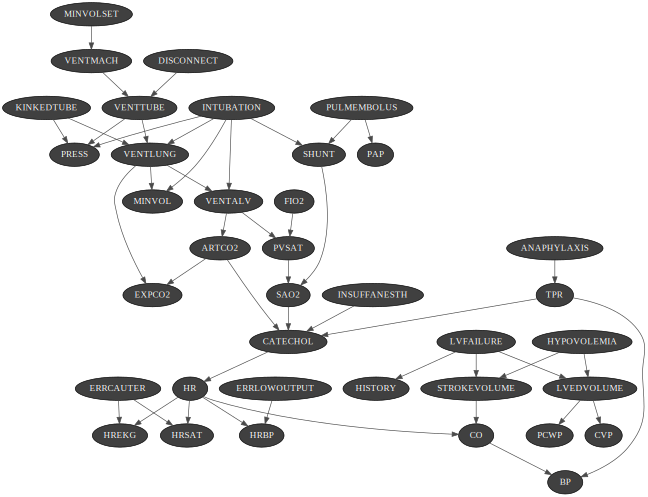

In [3]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))
gnb.showBN(bn,size='9')

Visualisation and inspection
============================

In [4]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [5]:
print(bn.cpt(bn.idFromName('SHUNT')))


             ||  SHUNT            |
PULMEM|INTUBA||NORMAL   |HIGH     |
------|------||---------|---------|
TRUE  |NORMAL|| 0.1000  | 0.9000  |
FALSE |NORMAL|| 0.9500  | 0.0500  |
TRUE  |ESOPHA|| 0.1000  | 0.9000  |
FALSE |ESOPHA|| 0.9500  | 0.0500  |
TRUE  |ONESID|| 0.0100  | 0.9900  |
FALSE |ONESID|| 0.0500  | 0.9500  |



In [6]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

Results of inference
====================

It is easy to look at result of inference

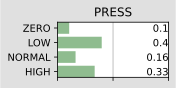

In [7]:
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

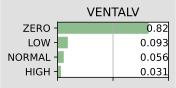

In [8]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

Overall results

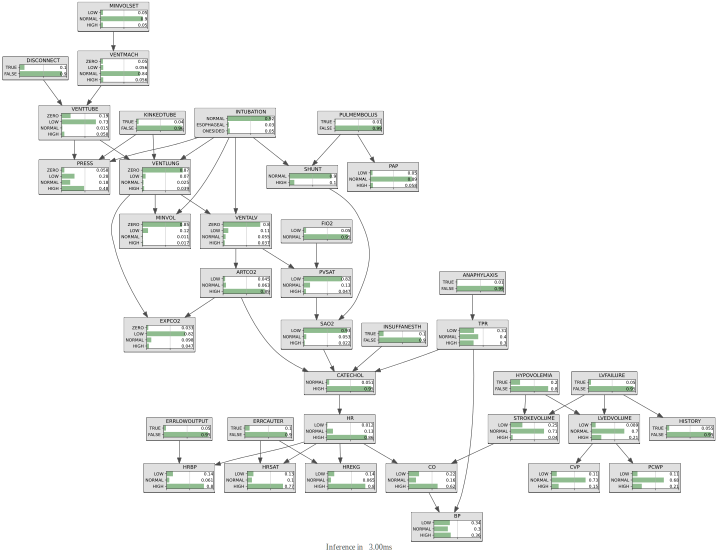

In [9]:
gnb.showInference(bn,size="10")

What is the impact of observed variables (SHUNT and VENTALV for instance) on another on (PRESS) ?

In [10]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

(gum::Potential<double>@00000226EB8952A0) 
             ||  PRESS                                |
VENTAL|SHUNT ||ZERO     |LOW      |NORMAL   |HIGH     |
------|------||---------|---------|---------|---------|
ZERO  |NORMAL|| 0.0569  | 0.2669  | 0.2005  | 0.4757  |
LOW   |NORMAL|| 0.0208  | 0.2515  | 0.0553  | 0.6724  |
NORMAL|NORMAL|| 0.0769  | 0.3267  | 0.1772  | 0.4192  |
HIGH  |NORMAL|| 0.0501  | 0.1633  | 0.2796  | 0.5071  |
ZERO  |HIGH  || 0.0589  | 0.2726  | 0.1997  | 0.4688  |
LOW   |HIGH  || 0.0318  | 0.2237  | 0.0521  | 0.6924  |
NORMAL|HIGH  || 0.1735  | 0.5839  | 0.1402  | 0.1024  |
HIGH  |HIGH  || 0.0711  | 0.2347  | 0.2533  | 0.4410  |

Using inference as a function
====================

It is also easy to use inference as a routine in more complex procedures.

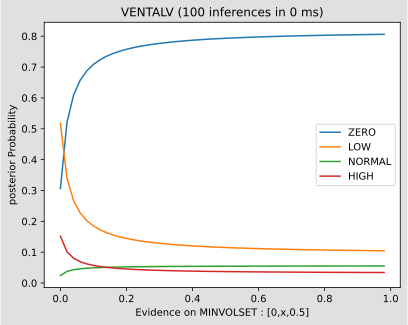

In [11]:
import time
r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist() 
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i) 
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]')
plt.show()

Another example : python gives access to a large set of tools. Here the value for the equality of two probabilities of a posterior is easely computed.

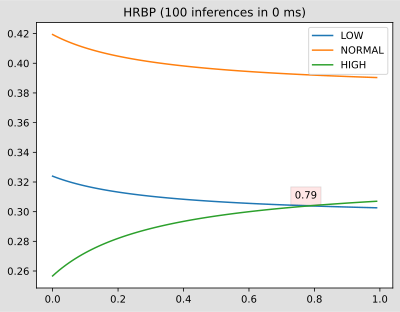

In [12]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist() 
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[0]>transpose(y)[2]).argmin()
text(x[np1]-0.05,y[np1][0]+0.005,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1))
plt.show()

BN as a classifier
================

Generation of databases
-----------------------

Using the CSV format for the database:

In [13]:
gum.generateCSV(bn,os.path.join("out","test.csv"),1000,with_labels=True)

-14869.206263327273

In [14]:
from pyAgrum.lib._utils import oslike
oslike.head(os.path.join("out",'test.csv'))

DISCONNECT,SAO2,BP,PULMEMBOLUS,TPR,PRESS,VENTALV,LVEDVOLUME,HRBP,HR,VENTMACH,HRSAT,STROKEVOLUME,MINVOLSET,VENTLUNG,LVFAILURE,KINKEDTUBE,HREKG,MINVOL,CVP,ANAPHYLAXIS,FIO2,ARTCO2,INSUFFANESTH,ERRCAUTER,INTUBATION,PAP,CATECHOL,PVSAT,EXPCO2,HISTORY,ERRLOWOUTPUT,HYPOVOLEMIA,SHUNT,VENTTUBE,CO,PCWP
FALSE,LOW,HIGH,FALSE,HIGH,NORMAL,ZERO,NORMAL,NORMAL,HIGH,NORMAL,HIGH,NORMAL,NORMAL,ZERO,FALSE,FALSE,HIGH,ZERO,NORMAL,FALSE,NORMAL,HIGH,FALSE,FALSE,NORMAL,NORMAL,HIGH,LOW,LOW,FALSE,TRUE,FALSE,NORMAL,LOW,HIGH,NORMAL
FALSE,LOW,HIGH,FALSE,NORMAL,ZERO,ZERO,NORMAL,NORMAL,HIGH,LOW,HIGH,NORMAL,LOW,ZERO,FALSE,FALSE,HIGH,ZERO,NORMAL,FALSE,NORMAL,HIGH,FALSE,FALSE,NORMAL,NORMAL,HIGH,LOW,LOW,FALSE,TRUE,FALSE,NORMAL,ZERO,HIGH,NORMAL
FALSE,LOW,HIGH,FALSE,NORMAL,HIGH,LOW,NORMAL,HIGH,HIGH,HIGH,HIGH,NORMAL,HIGH,LOW,FALSE,FALSE,HIGH,LOW,NORMAL,FALSE,NORMAL,HIGH,FALSE,FALSE,NORMAL,NORMAL,HIGH,NORMAL,NORMAL,FALSE,FALSE,FALSE,NORMAL,HIGH,HIGH,NORMAL
FALSE,LOW,NORMAL,FALSE,NORMAL,HIGH,ZERO,NORMAL,HIGH,HIGH,NORMAL,HIGH,NO

BN as a classifier
------------------

(because of the use of from-bn-generated csv files, quite good ROC curves are expected)

 out\test.csv : [ ############################################################ ] 100%

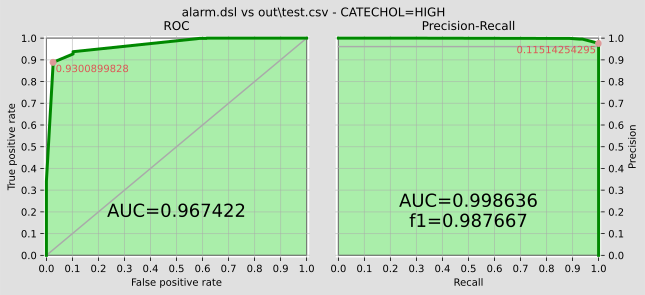

(0.9674217561834627, 0.9300899828, 0.9986359487303429, 0.11514254295)

In [15]:
from pyAgrum.lib.bn2roc import showROC_PR

showROC_PR(bn,os.path.join("out","test.csv"),
        target='CATECHOL',label='HIGH',  # class and label 
        show_progress=True,show_fig=True,with_labels=True)        

Using another class variable

 out\test.csv : [ ############################################################ ] 100%

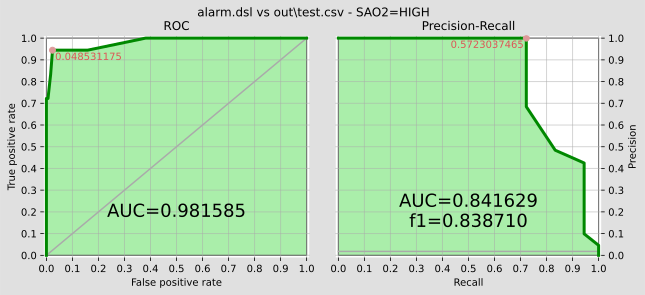

(0.9815852002715546, 0.048531175, 0.8416294583402385, 0.5723037465)

In [16]:
showROC_PR(bn,os.path.join("out","test.csv"),'SAO2','HIGH',show_progress=True)

# Fast prototyping for BNs

In [17]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


In [18]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))


  c                          |
0        |1        |2        |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |


  a                          |
0        |1        |2        |
---------|---------|---------|
 0.3463  | 0.2861  | 0.3676  |



# Joint posterior, impact of multiple evidence

In [19]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [20]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","g"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [21]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [22]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )